In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [ ]:
!unzip -u "/content/drive/MyDrive/Self supervised learning/lablled ddr.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/DR_grading/DR_grading/20170213154950093.jpg  
  inflating: /content/DR_grading/DR_grading/20170213165734780.jpg  
  inflating: /content/DR_grading/DR_grading/20170213165754449.jpg  
  inflating: /content/DR_grading/DR_grading/20170213165901333.jpg  
  inflating: /content/DR_grading/DR_grading/20170213165917903.jpg  
  inflating: /content/DR_grading/DR_grading/20170213170102397.jpg  
  inflating: /content/DR_grading/DR_grading/20170213170349139.jpg  
  inflating: /content/DR_grading/DR_grading/20170213170404024.jpg  
  inflating: /content/DR_grading/DR_grading/20170213170633871.jpg  
  inflating: /content/DR_grading/DR_grading/20170213170649949.jpg  
  inflating: /content/DR_grading/DR_grading/20170214084615083.jpg  
  inflating: /content/DR_grading/DR_grading/20170214091106462.jpg  
  inflating: /content/DR_grading/DR_grading/20170214091449944.jpg  
  inflating: /content/DR_grading/DR_grading/20170214093017393.jpg

In [ ]:
import os
import pandas as pd
import shutil

# Path to the folder containing the images
image_folder = '/content/DR_grading/DR_grading'

# Path to the CSV file
csv_file = '/content/DR_grading.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_filename = row['id_code']  # Get the image filename
    class_label = str(row['diagnosis'])  # Get the class label as a string

    # Create a directory for the class label if it doesn't exist
    class_folder = os.path.join(image_folder, class_label)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Construct the source and destination paths
    source_path = os.path.join(image_folder, image_filename)
    destination_path = os.path.join(class_folder, image_filename)

    # Move the image to the appropriate class folder
    shutil.move(source_path, destination_path)

print("Images have been split into class folders.")


Images have been split into class folders.


In [ ]:
!pip install split-folders
import splitfolders
import os
input_folder="/content/DR_grading/DR_grading"
output="/content/output"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.7,0,.3)) ### train 75%, val 10%, test 15%

Copying files: 12522 files [00:48, 260.79 files/s]


In [ ]:
import os
import shutil

original_root = '/content/DR_grading/DR_grading/'

# Define the root directory to create the client-based structure
new_root = '/content/root/'

# Create 7 client directories
for i in range(1, 4):
    client_name = f"{i}"
    client_dir = os.path.join(new_root, client_name)
    os.makedirs(client_dir, exist_ok=True)

class_dirs = os.listdir(original_root)

client_counter = 1

for class_dir in class_dirs:
    class_path = os.path.join(original_root, class_dir)
    image_files = os.listdir(class_path)
    images_per_client = len(image_files) // 3
    class_image_counter = 0
    for image_file in image_files:
        client_name = f"{client_counter}"
        client_dir = os.path.join(new_root, client_name, class_dir)
        os.makedirs(client_dir, exist_ok=True)

        image_src_path = os.path.join(class_path, image_file)
        image_dest_path = os.path.join(client_dir, image_file)
        shutil.copy(image_src_path, image_dest_path)
        client_counter = (client_counter % 3) + 1
        class_image_counter += 1
        if class_image_counter >= images_per_client:
            break

print("Dataset restructuring complete.")

Dataset restructuring complete.


In [ ]:
import tensorflow as tf
import tensorflow_federated as tff
import os

custom_dataset_path = '/content/root'


input_height = 28
input_width = 28

def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize_with_pad(image, input_height, input_width)
    return {'label': label, 'pixels': image}

def create_custom_dataset_for_client(client_id):
    client_image_paths = tf.data.Dataset.list_files(os.path.join(custom_dataset_path, '*', '*', f'image{client_id}.jpg'))
    label = int(client_image_paths.take(1).map(lambda path: tf.strings.split(tf.strings.split(path, os.path.sep)[-3], '/')[-1]))
    client_dataset = client_image_paths.map(lambda path: preprocess_image(path, label))
    return client_dataset

client_ids = ['0', '1', '2']

def create_federated_dataset():
    client_data = [create_custom_dataset_for_client(client_id) for client_id in client_ids]
    return tff.simulation.datasets.ClientData.from_clients_and_tf_fn(client_ids, lambda client_id: client_data[client_ids.index(client_id)])

custom_train = create_federated_dataset()

element_type_structure = {
    'label': tf.int32,
    'pixels': tf.TensorSpec(shape=(input_height, input_width, 1), dtype=tf.float32)
}

custom_train._element_type_structure = element_type_structure
print(len(custom_train.client_ids))

In [ ]:
len(custom_train.client_ids)

3

In [ ]:
custom_train.element_type_structure

DatasetSpec((TensorSpec(shape=(28, 28, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None)), TensorShape([]))

In [ ]:
example_dataset = custom_train.create_tf_dataset_for_client(
    custom_train.client_ids[1])
example_element = next(iter(example_dataset))
example_element['label'].numpy()

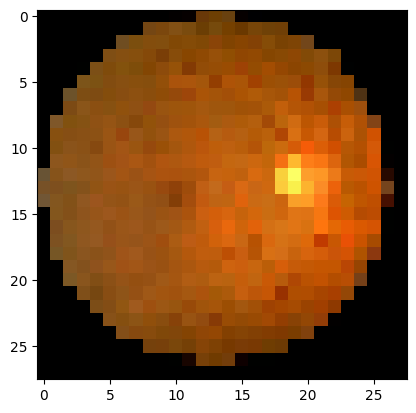

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()


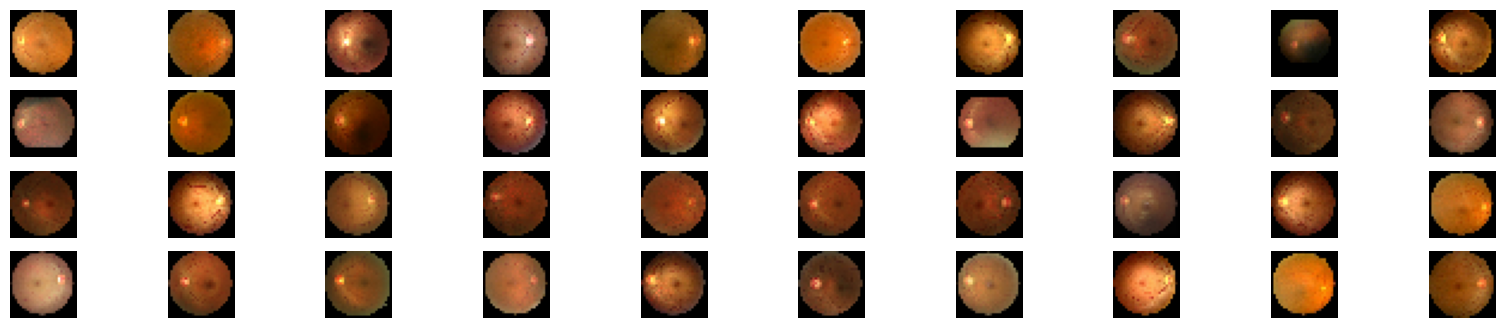

In [ ]:
figure = plt.figure(figsize=(20, 4))
j = 0

for example in example_dataset.take(40):
  plt.subplot(4, 10, j+1)
  plt.imshow(example['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

In [ ]:
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(6):
  client_dataset = custom_dataset.create_tf_dataset_for_client(
      custom_dataset.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    label = example['label'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i+1)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
for i in range(5):
  client_dataset = custom_train.create_tf_dataset_for_client(
      custom_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    plot_data[example['label'].numpy()].append(example['pixels'].numpy())
  f = plt.figure(i, figsize=(12, 5))
  f.suptitle("Client #{}'s Mean Image Per Label".format(i))
  for j in range(10):
    mean_img = np.mean(plot_data[j], 0)
    plt.subplot(2, 5, j+1)
    plt.imshow(mean_img.reshape((28, 28)))
    plt.axis('off')

In [ ]:
NUM_CLIENTS = 5
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    return collections.OrderedDict(
        x=tf.reshape(element['pixels'], [-1, 784]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [ ]:
preprocessed_example_dataset = preprocess(example_dataset)
sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))
sample_batch

OrderedDict([('x',
              array([[0.        , 0.        , 0.0003631 , ..., 0.        , 0.        ,
                      0.        ],
                     [0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     ...,
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ]], dtype=float32)),
             ('y',
              array([[b'client_6'],
                     [b'client_6'],
                     [b'client_6'],
                     [b'client_6'],
                     [b'client_6'],
      

In [ ]:

def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]


In [ ]:
sample_clients = custom_train.client_ids[0:NUM_CLIENTS]
federated_train_data = make_federated_data(custom_train, sample_clients)

print(f'Number of client datasets: {len(federated_train_data)}')
print(f'First dataset: {federated_train_data[0]}')

Number of client datasets: 5
First dataset: <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.string, name=None))])>


In [ ]:
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [ ]:
def model_fn():
  keras_model = create_keras_model()
  return tff.learning.models.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
training_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [ ]:
print(training_process.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[784,10],
      float32[10]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[784,10],
    float32[10]
  >
>@SERVER)


In [ ]:
train_state = training_process.initialize()

In [ ]:
result = training_process.next(train_state, federated_train_data)
train_state = result.state
train_metrics = result.metrics
print('round  1, metrics={}'.format(train_metrics))

In [ ]:
NUM_ROUNDS = 5
for round_num in range(2, NUM_ROUNDS):
  result = training_process.next(train_state, federated_train_data)
  train_state = result.state
  train_metrics = result.metrics
  print('round {:2d}, metrics={}'.format(round_num, train_metrics))

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.99772096), ('loss', 0.023086384), ('num_examples', 61430), ('num_batches', 3074)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [ ]:
MyVariables = collections.namedtuple(
    'MyVariables', 'weights bias num_examples loss_sum accuracy_sum')

In [ ]:
def create_my_variables():
  return MyVariables(
      weights=tf.Variable(
          lambda: tf.zeros(dtype=tf.float32, shape=(784, 10)),
          name='weights',
          trainable=True),
      bias=tf.Variable(
          lambda: tf.zeros(dtype=tf.float32, shape=(10)),
          name='bias',
          trainable=True),
      num_examples=tf.Variable(0.0, name='num_examples', trainable=False),
      loss_sum=tf.Variable(0.0, name='loss_sum', trainable=False),
      accuracy_sum=tf.Variable(0.0, name='accuracy_sum', trainable=False))

In [ ]:
def predict_on_batch(variables, x):
  return tf.nn.softmax(tf.matmul(x, variables.weights) + variables.bias)

def my_forward_pass(variables, batch):
  y = predict_on_batch(variables, batch['x'])
  predictions = tf.cast(tf.argmax(y, 1), tf.int32)

  flat_labels = tf.reshape(batch['y'], [-1])
  loss = -tf.reduce_mean(
      tf.reduce_sum(tf.one_hot(flat_labels, 10) * tf.math.log(y), axis=[1]))
  accuracy = tf.reduce_mean(
      tf.cast(tf.equal(predictions, flat_labels), tf.float32))

  num_examples = tf.cast(tf.size(batch['y']), tf.float32)

  variables.num_examples.assign_add(num_examples)
  variables.loss_sum.assign_add(loss * num_examples)
  variables.accuracy_sum.assign_add(accuracy * num_examples)

  return loss, predictions

In [ ]:
def get_local_unfinalized_metrics(variables):
  return collections.OrderedDict(
      num_examples=[variables.num_examples],
      loss=[variables.loss_sum, variables.num_examples],
      accuracy=[variables.accuracy_sum, variables.num_examples])

In [ ]:
def get_metric_finalizers():
  return collections.OrderedDict(
      num_examples=tf.function(func=lambda x: x[0]),
      loss=tf.function(func=lambda x: x[0] / x[1]),
      accuracy=tf.function(func=lambda x: x[0] / x[1]))

In [ ]:
import collections
from collections.abc import Callable

class MyModel(tff.learning.models.VariableModel):

  def __init__(self):
    self._variables = create_my_variables()

  @property
  def trainable_variables(self):
    return [self._variables.weights, self._variables.bias]

  @property
  def non_trainable_variables(self):
    return []

  @property
  def local_variables(self):
    return [
        self._variables.num_examples, self._variables.loss_sum,
        self._variables.accuracy_sum
    ]

  @property
  def input_spec(self):
    return collections.OrderedDict(
        x=tf.TensorSpec([None, 784], tf.float32),
        y=tf.TensorSpec([None, 1], tf.int32))

  @tf.function
  def predict_on_batch(self, x, training=True):
    del training
    return predict_on_batch(self._variables, x)

  @tf.function
  def forward_pass(self, batch, training=True):
    del training
    loss, predictions = my_forward_pass(self._variables, batch)
    num_exmaples = tf.shape(batch['x'])[0]
    return tff.learning.models.BatchOutput(
        loss=loss, predictions=predictions, num_examples=num_exmaples)

  @tf.function
  def report_local_unfinalized_metrics(
      self) -> collections.OrderedDict[str, list[tf.Tensor]]:
    """Creates an `OrderedDict` of metric names to unfinalized values."""
    return get_local_unfinalized_metrics(self._variables)

  def metric_finalizers(
      self) -> collections.OrderedDict[str, Callable[[list[tf.Tensor]], tf.Tensor]]:
    """Creates an `OrderedDict` of metric names to finalizers."""
    return get_metric_finalizers()

  @tf.function
  def reset_metrics(self):
    """Resets metrics variables to initial value."""
    for var in self.local_variables:
      var.assign(tf.zeros_like(var))

In [ ]:
training_process = tff.learning.algorithms.build_weighted_fed_avg(
    MyModel,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02))

In [ ]:
train_state = training_process.initialize()

In [ ]:
result = training_process.next(train_state, federated_train_data)
train_state = result.state
metrics = result.metrics
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('num_examples', 43820.0), ('loss', 0.031812962), ('accuracy', 0.99817437)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [ ]:
for round_num in range(2, 11):
  result = training_process.next(train_state, federated_train_data)
  train_state = result.state
  metrics = result.metrics
  print('round {:2d}, metrics={}'.format(round_num, metrics))

In [ ]:
evaluation_process = tff.learning.algorithms.build_fed_eval(MyModel)

In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())


(<
  state=<
    global_model_weights=<
      trainable=<
        float32[784,10],
        float32[10]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        num_examples=<
          float32
        >,
        loss=<
          float32,
          float32
        >,
        accuracy=<
          float32,
          float32
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_process=<>
    >,
    finalizer=<>
  >@SERVER,
  client_data={<
    x=float32[?,784],
    y=int32[?,1]
  >*}@CLIENTS
> -> <
  state=<
    global_model_weights=<
      trainable=<
        float32[784,10],
        float32[10]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        num_examples=<
          float32
        >,
        loss=<
          float32,
          float32
        >,
        accuracy=<
          float32,
          float32
        >
      >
    >,
    aggregator=<
      value_

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = training_process.get_model_weights(train_state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_train_data)

In [ ]:
str(evaluation_output.metrics)

In [ ]:
federated_test_data = make_federated_data(custom_test, sample_clients)

len(federated_test_data), federated_test_data[0]

(5,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

In [ ]:
str(evaluation_output.metrics)